In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
#2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [7]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [8]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connect

In [9]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [10]:
# Set up video capture from the camera (in this case, camera index 0)
cap = cv2.VideoCapture(0)

# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read frame from the video feed
        ret, frame = cap.read()

        if not ret:
            print("Failed to capture a frame.")
            break

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Mirror the frame horizontally
        mirrored_frame = cv2.flip(image, 1)

        # Show the mirrored frame on the screen
        cv2.imshow('OpenCV Feed', mirrored_frame)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Release the video capture and close the OpenCV windows
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [17]:
len(results.left_hand_landmarks.landmark)


21

In [11]:
results


mediapipe.python.solution_base.SolutionOutputs

In [12]:
draw_landmarks(frame, results)


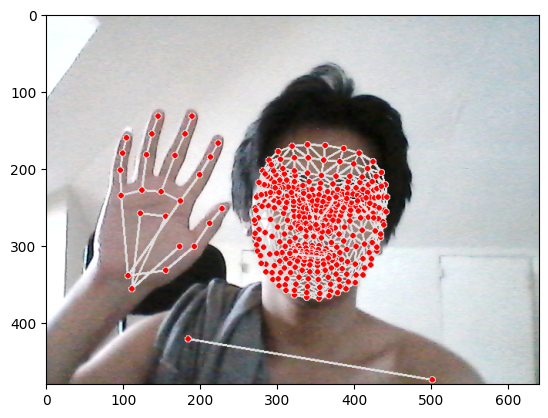

In [13]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


In [14]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [15]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [16]:
rh

array([ 1.66649669e-01,  7.08054304e-01,  4.38852510e-07,  2.42810085e-01,
        6.92404211e-01, -1.80910677e-02,  3.00935030e-01,  6.28801644e-01,
       -1.79780722e-02,  3.31585497e-01,  5.65465391e-01, -1.74818039e-02,
        3.57172787e-01,  5.25902629e-01, -1.67462621e-02,  2.72397637e-01,
        5.05306602e-01,  8.80373816e-04,  3.11720848e-01,  4.34066296e-01,
       -9.18855518e-03,  3.33428770e-01,  3.87236297e-01, -1.99276246e-02,
        3.49857867e-01,  3.48531365e-01, -2.81796567e-02,  2.33266041e-01,
        4.79193568e-01, -7.46264297e-04,  2.61940867e-01,  3.81604791e-01,
       -9.89779271e-03,  2.81852484e-01,  3.23257267e-01, -2.07317974e-02,
        2.96418488e-01,  2.75626630e-01, -2.82376036e-02,  1.93797931e-01,
        4.75683719e-01, -6.23559253e-03,  2.03614250e-01,  3.80828857e-01,
       -1.83212273e-02,  2.15392664e-01,  3.24561685e-01, -2.97671519e-02,
        2.27255851e-01,  2.76431680e-01, -3.74052972e-02,  1.51728839e-01,
        4.90907401e-01, -

In [17]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [18]:
result_test = extract_keypoints(results)


In [19]:
np.save('0', result_test)


In [20]:
np.load('0.npy')


array([ 0.54698092,  0.57046604, -1.066149  , ...,  0.16341472,
        0.33488402, -0.03587074])

##Train Again


In [171]:
cap.release()
cv2.destroyAllWindows()


In [9]:
#4. Setup Folders for Collection

In [2]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions =  np.array(['hello', 'thank you', 'how are you', 'I\'m fine', 'thank you'])

# videos worth of data
no_sequences = 1000

# Videos are going to be 30 frames in length
sequence_length = 23

In [9]:
#for action in actions: 
   # dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    #for sequence in range(1,no_sequences+1):
     #   try: 
      #      os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
     #   except:
           # pass

In [30]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [31]:
#5. Collect Keypoint Values for Training and Testing

In [27]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(50, 70):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()


In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [4]:
    # Path for exported data, numpy arrays
    DATA_PATH = os.path.join('MP_Data') 
    
    # Actions that we try to detect
    actions = np.array(['hello', 'thank you', 'how are you', 'I\'m fine', 'I love you'])
    
    # videos worth of data
    no_sequences = 1000
    
    # Videos are going to be 30 frames in length
    sequence_length = 23

In [6]:
# 6. Preprocess Data and Create Labels and Features

In [5]:
label_map = {label:num for num, label in enumerate(actions)}


In [6]:
label_map


{'hello': 0, 'thank you': 1, 'how are you': 2, "I'm fine": 3, 'I love you': 4}

In [7]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [10]:
np.array(sequences).shape


(5000, 23, 1662)

In [11]:
np.array(labels).shape


(5000,)

In [12]:
X = np.array(sequences)


In [13]:
X.shape


(5000, 23, 1662)

In [14]:
y = to_categorical(labels).astype(int)


In [15]:
y

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)


In [17]:
y_test.shape


(250, 5)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [19]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [20]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(23,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [21]:
res = [.7, 0.2, 0.1]


In [22]:
actions[np.argmax(res)]


'hello'

In [23]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


In [25]:
model.fit(X_train, y_train, epochs=100, callbacks=[tb_callback])


MemoryError: Unable to allocate 693. MiB for an array with shape (4750, 23, 1662) and data type float32

In [167]:
res = model.predict(X_test)


1/1 [==============================] - 0s 78ms/step


In [168]:
# 9. Save Weights

In [26]:
model.save('action.h5')


C:\Users\christine\awa\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [147]:
#END TRAIN

In [186]:
model.load_weights('action.h5')


In [27]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score


In [28]:
# 10. Evaluation using Confusion Matrix and Accuracy

In [29]:
yhat = model.predict(X_test)


8/8 [==============================] - 2s 47ms/step


In [190]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [191]:
accuracy_score(ytrue, yhat)


1.0

In [90]:
ytrue

[3, 0, 1, 1, 2, 1, 4, 3, 0, 0, 1, 4, 0, 3, 0, 2, 3, 3]

In [91]:
multilabel_confusion_matrix(ytrue, yhat)


array([[[13,  0],
        [ 0,  5]],

       [[14,  0],
        [ 0,  4]],

       [[15,  1],
        [ 0,  2]],

       [[13,  0],
        [ 0,  5]],

       [[16,  0],
        [ 1,  1]]], dtype=int64)

In [92]:
# 11. Test in Real Time

In [93]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

NameError: name 'prob_viz' is not defined

<Figure size 1800x1800 with 0 Axes>

In [94]:
colors = [(245,117,16), (117,245,16), (16,117,245), (245,125,16), (16,117,100)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [95]:
sequence.append('def')


AttributeError: 'int' object has no attribute 'append'

In [96]:
sequence.reverse()


AttributeError: 'int' object has no attribute 'reverse'

In [ ]:
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.8, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            mirrored_frame = cv2.flip(image, 1)
            image = prob_viz(res, actions, image, colors)

        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [496]:
res[np.argmax(res)] > threshold


False

In [40]:
cap.release()
cv2.destroyAllWindows()
